In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler




In [18]:
df = pd.read_csv("sales_data_sample.csv",encoding='latin-1')


In [20]:
X = df[['SALES', 'QUANTITYORDERED']]


In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [30]:

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)



C:\Users\TEJAL MORE\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\TEJAL MORE\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\TEJAL MORE\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\TEJAL MORE\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

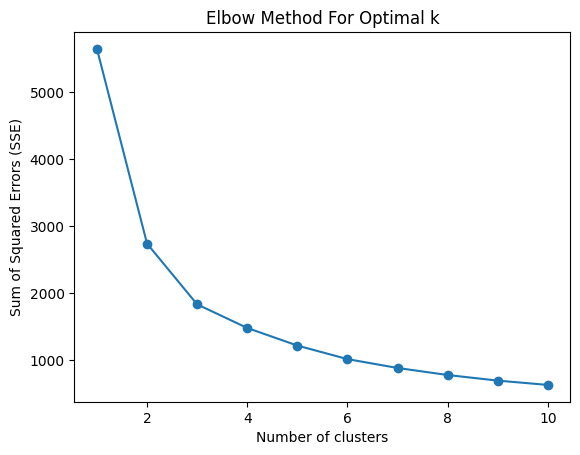

In [34]:
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()



In [32]:
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(df[['SALES', 'QUANTITYORDERED', 'Cluster']].head())

     SALES  QUANTITYORDERED  Cluster
0  2871.00               30        1
1  2765.90               34        0
2  3884.34               41        0
3  3746.70               45        0
4  5205.27               49        2


C:\Users\TEJAL MORE\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


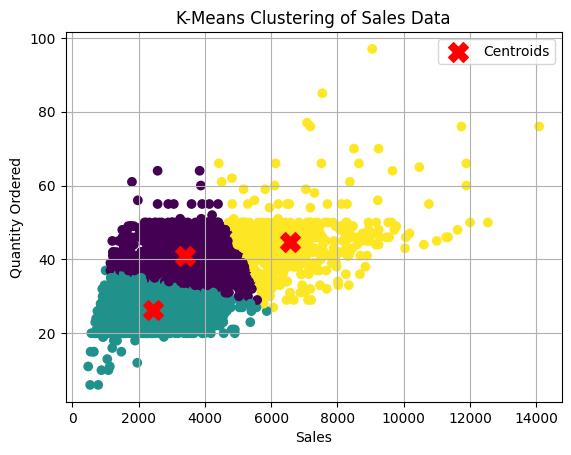

In [40]:
import matplotlib.pyplot as plt


plt.scatter(df['SALES'], df['QUANTITYORDERED'], c=df['Cluster'])

# Marking cluster centers
centers = kmeans.cluster_centers_
plt.scatter(scaled_centers[:, 0], scaled_centers[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering of Sales Data')
plt.xlabel('Sales')
plt.ylabel('Quantity Ordered')
plt.legend()
plt.grid(True)
plt.show()
